In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [10]:
data=pd.read_csv("water_potability.csv")
data = pd.DataFrame(data)
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [11]:
print(data.dtypes)
data.shape

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


(3276, 10)

In [12]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
data.fillna(data.mean(), inplace=True)



data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [14]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
data[['Hardness', 'Solids','Sulfate','Conductivity','Trihalomethanes']] = min_max_scaler.fit_transform(data[['Hardness', 'Solids','Sulfate','Conductivity','Trihalomethanes']])
data.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  7.080795  0.571139  0.336096     7.300212  0.680385      0.669439   
1  3.716080  0.297400  0.300611     6.635246  0.581699      0.719411   
2  8.099124  0.641311  0.321619     9.275884  0.581699      0.414652   
3  8.316766  0.605536  0.356244     8.059332  0.647347      0.317880   
4  9.092223  0.484851  0.289922     6.546600  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783         0.699753   2.963135           0  
1       15.180013         0.450999   4.500656           0  
2       16.868637         0.532866   3.055934           0  
3       18.436524         0.808065   4.628771           0  
4       11.558279         0.253606   4.075075           0

In [16]:
data.describe()

ph     Hardness       Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000  3276.000000  3276.000000  3276.000000   
mean      7.080795     0.540231     0.356173     7.122277     0.581699   
std       1.469956     0.119263     0.143968     1.583085     0.102669   
min       0.000000     0.000000     0.000000     0.352000     0.000000   
25%       6.277673     0.469432     0.251957     6.127421     0.534313   
50%       7.080795     0.542401     0.338338     7.130299     0.581699   
75%       7.870050     0.613857     0.443498     8.114887     0.628882   
max      14.000000     1.000000     1.000000    13.127000     1.000000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean       0.427940       14.284970         0.532673     3.966786     0.390110  
std        0.141336        3.308162         0.127938     0.780382     0.487849  
min        0.000000        2.200000         0.000000     1.450000     0.000000  
25%        0.322196       12.065801         0.453584     3.439711     0.000000  
50%        0.420386       14.218338         0.532673     3.955028     0.000000  
75%        0.525145       16.557652         0.615994     4.500320     1.000000  
max        1.000000       28.300000         1.000000     6.739000     1.000000

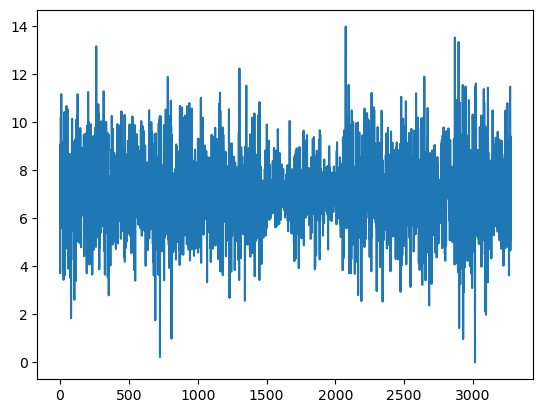

In [17]:
plt.plot(data.ph)

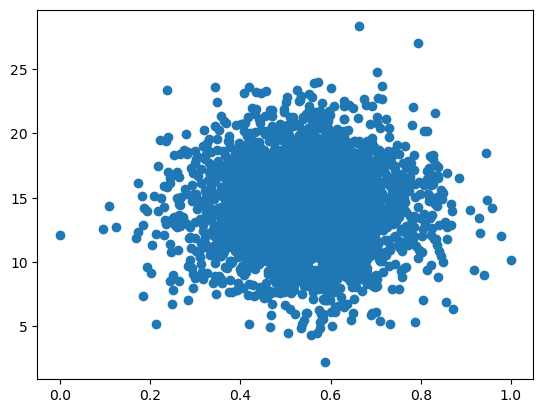

In [18]:
plt.scatter(data.Hardness,data.Organic_carbon)

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

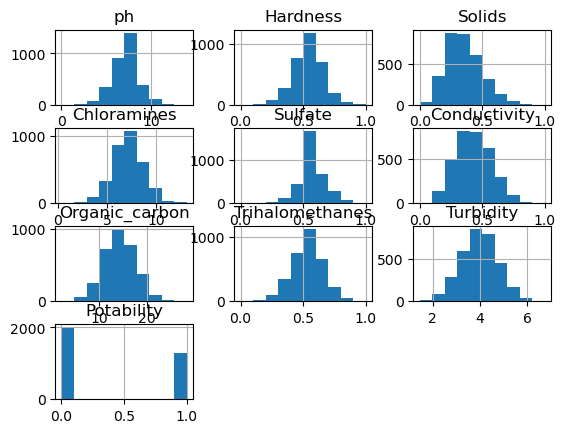

In [19]:
data.hist()

<Axes: >

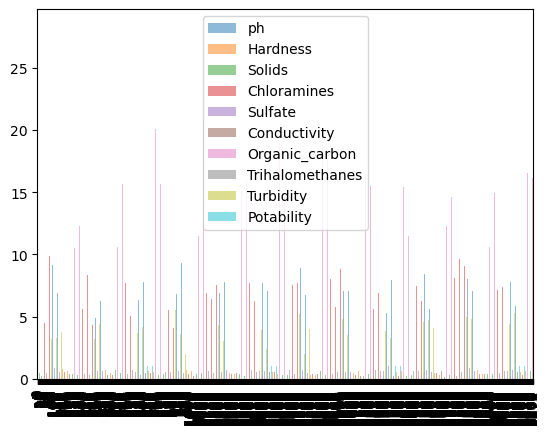

In [20]:
data.plot.bar(alpha=0.5)

<Axes: >

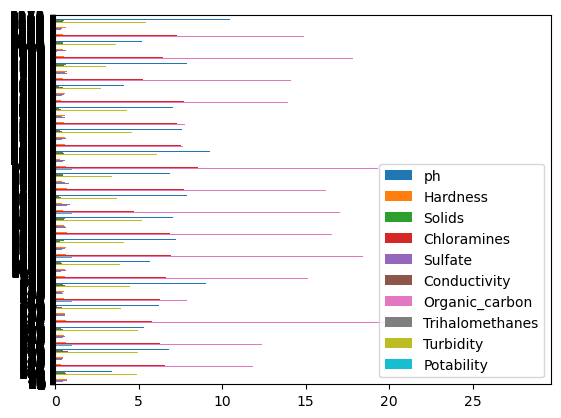

In [21]:
data.plot.barh()

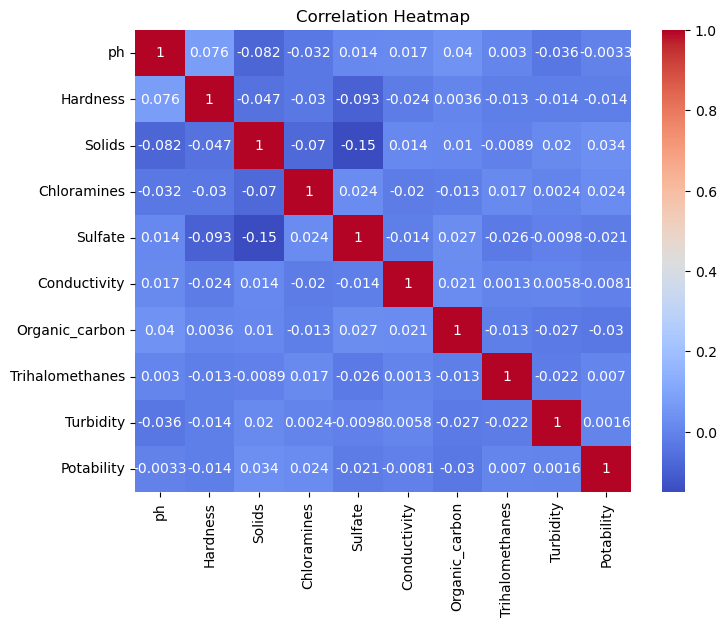

In [22]:
corr_matrix = data.corr()

# Generate the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
x=data.iloc[:,0:9]
y=data["Potability"]
x

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     7.080795  0.571139  0.336096     7.300212  0.680385      0.669439   
1     3.716080  0.297400  0.300611     6.635246  0.581699      0.719411   
2     8.099124  0.641311  0.321619     9.275884  0.581699      0.414652   
3     8.316766  0.605536  0.356244     8.059332  0.647347      0.317880   
4     9.092223  0.484851  0.289922     6.546600  0.514545      0.379337   
...        ...       ...       ...          ...       ...           ...   
3271  4.668102  0.530482  0.775947     7.166639  0.656047      0.603192   
3272  7.808856  0.530016  0.279263     8.061362  0.581699      0.368912   
3273  9.419510  0.465486  0.539101     7.350233  0.581699      0.438152   
3274  5.126763  0.664407  0.191490     6.303357  0.581699      0.387157   
3275  7.874671  0.535635  0.280484     7.509306  0.581699      0.255266   

      Organic_carbon  Trihalomethanes  Turbidity  
0          10.379783         0.699753   2.963135  
1          15.180013         0.450999   4.500656  
2          16.868637         0.532866   3.055934  
3          18.436524         0.808065   4.628771  
4          11.558279         0.253606   4.075075  
...              ...              ...        ...  
3271       13.894419         0.535037   4.435821  
3272       19.903225         0.532673   2.798243  
3273       11.039070         0.560655   3.298875  
3274       11.168946         0.622659   4.708658  
3275       16.140368         0.632478   2.309149  

[3276 rows x 9 columns]

In [24]:
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
print("x_train : ",x_train.shape,", y_train : ",y_train.shape)
print("x_test : ",x_test.shape,", y_test : ",y_test.shape)

x_train :  (2293, 9) , y_train :  (2293,)
x_test :  (983, 9) , y_test :  (983,)


In [26]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=7)
# Train the classifier
knn.fit(x_train, y_train)
# Make predictions on the test set
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [27]:
# The confusion matrix is a square matrix of size (number of classes) x
#(number of classes), where each cell represents the count of instances belonging to a particular 
#true class and predicted class. It can be used to calculate various evaluation metrics such as accuracy,
#precision, recall, and F1-score.
from sklearn.metrics import confusion_matrix
# Assuming you already have the true labels (y_test) and predicted labels (y_pred)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[441, 176],
       [255, 111]], dtype=int64)

In [29]:
# Calculate the accuracy of the classifier
# The accuracy_score function compares each element of y_test with the corresponding element in y_pred and returns
# the accuracy as a floating-point number between 0 and 1, where 1 represents a perfect prediction.
from sklearn.metrics import accuracy_score
# accuracy_score
accuracy_knn_befor_bagging = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn_befor_bagging)


Accuracy: 0.5615462868769074


In [30]:
from sklearn.metrics import precision_score
# precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:", precision)
from sklearn.metrics import recall_score
# recall_score
recall_score = recall_score(y_test, y_pred_knn)
print("Recall_score:", recall_score)
from sklearn.metrics import f1_score
# f1_measure
f1 = f1_score(y_test, y_pred_knn)
print("F1_measure:", f1)

Precision: 0.3867595818815331
Recall_score: 0.30327868852459017
F1_measure: 0.3399693721286371


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_tree=dtree.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score_tree_befor_bagging=accuracy_score(y_test,y_pred_tree)
print("Accuracy:", accuracy_score_tree_befor_bagging)

Accuracy: 0.5564598168870803


In [33]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,feature_names=x.columns,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())


(process:11764): GLib-GIO-WARNING **: 09:27:19.744: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1214.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs


(process:804): GLib-GIO-WARNING **: 09:27:33.234: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1214.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



In [35]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(x_train,y_train)
y_pred_tree=dtree.predict(x_test)
accuracy_score_tree_gini=accuracy_score(y_test,y_pred_tree)
print("criterion=gini:", accuracy_score_tree_gini)



criterion=gini: 0.5534079348931842


In [36]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(x_train,y_train)
y_pred_tree=dtree.predict(x_test)
accuracy_score_tree_entropy=accuracy_score(y_test,y_pred_tree)
print("criterion=entropy:", accuracy_score_tree_entropy)

criterion=entropy: 0.6012207527975585


In [37]:
from sklearn.ensemble import BaggingClassifier
# Create a bagging ensemble of KNN classifiers
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

# Train the ensemble
bagging_knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = bagging_knn.predict(x_test)

# Calculate the accuracy
accuracy_knn_after_bagging = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn_after_bagging)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.5645981688708036


In [38]:
# Create a bagging ensemble of decision trees
bagging_dtree = BaggingClassifier(base_estimator=dtree, n_estimators=10, random_state=42)

# Train the ensemble
bagging_dtree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = bagging_dtree.predict(x_test)

# Calculate the accuracy
accuracy_score_tree_after_bagging = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score_tree_after_bagging)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6500508646998983


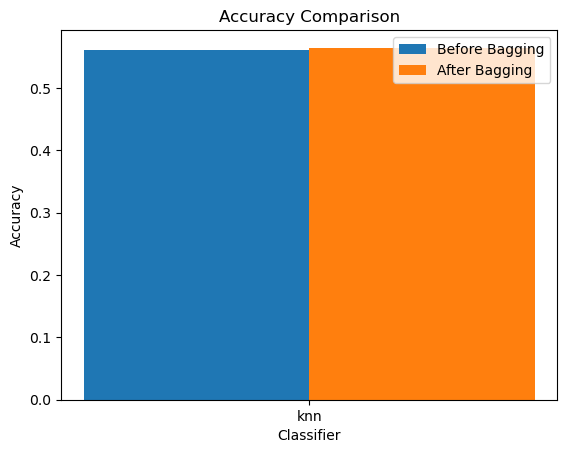

In [49]:
accuracies_befor_bagging = [accuracy_knn_befor_bagging]
accuracies_after_bagging = [accuracy_knn_after_bagging]
classifiers = [ "knn"]
v = np.arange(len(classifiers))
width = 0.35
fig, ax = plt.subplots()  
rects1 = ax.bar(v - width/2, accuracies_befor_bagging[0], width, label="Before Bagging")  
rects2 = ax.bar(v + width/2, accuracies_after_bagging[0], width, label="After Bagging")  
ax.set_ylabel("Accuracy")
ax.set_xlabel("Classifier")
ax.set_title("Accuracy Comparison")  
ax.set_xticks(v)
ax.set_xticklabels(classifiers)
ax.legend()
plt.show()


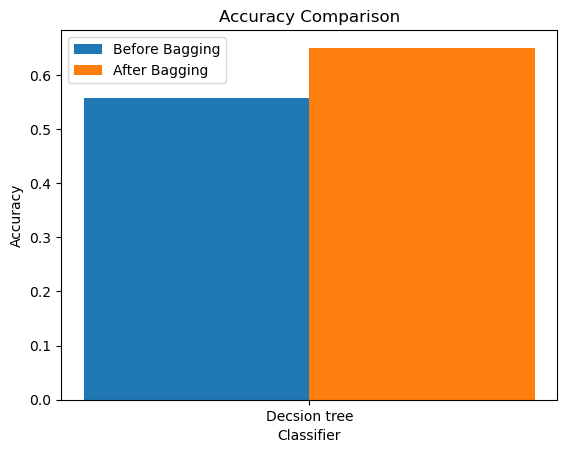

In [47]:
accuracies_befor_bagging = [ accuracy_score_tree_befor_bagging]
accuracies_after_bagging = [accuracy_score_tree_after_bagging]
classifiers = ["Decsion tree"]
v = np.arange(len(classifiers))
width = 0.35
fig, ax = plt.subplots()  
rects1 = ax.bar(v - width/2, accuracies_befor_bagging[0], width, label="Before Bagging")  
rects2 = ax.bar(v + width/2, accuracies_after_bagging[0], width, label="After Bagging")  
ax.set_ylabel("Accuracy")
ax.set_xlabel("Classifier")
ax.set_title("Accuracy Comparison")  
ax.set_xticks(v)
ax.set_xticklabels(classifiers)
ax.legend()
plt.show()